# Patch NN approach

In [85]:
from bs4                     import BeautifulSoup
import matplotlib.pyplot     as plt
import matplotlib.image      as mpimg
import numpy                 as np
import dicom
import scipy.misc
import os
import pylab

data_filepath = "/enc_data/eddata/pacemaker/"
ann_filepath = data_filepath + "ann/"
img_filepath = data_filepath + 'organized-data/'
png_filepath = data_filepath + 'png/'

## Average patch size

In [25]:
# Returns the dimensions of the box as: 
#     (x_min, x_max, y_min, y_max)
def get_box(filename): 
    with open(ann_filepath + filename, 'r') as f: 
        soup = BeautifulSoup(f, 'xml')
        
        box = soup.bndbox
        return (int(box.xmin.string), int(box.xmax.string), int(box.ymin.string), int(box.ymax.string))

print get_box('2620820_6565471-2169-11-22-1313-ANTERO-POSTERIOR.xml')

(1901, 2451, 699, 1245)


In [26]:
def get_x_size(box): 
    return box[1] - box[0]

def get_y_size(box): 
    return box[3] - box[2]

box = get_box('2620820_6565471-2169-11-22-1313-ANTERO-POSTERIOR.xml')
x_size = get_x_size(box)
y_size = get_y_size(box)

print x_size, y_size

550 546


In [31]:
def get_sizes(): 
    x_sizes, y_sizes = [], []
    
    for dicom_file in os.listdir(ann_filepath): 
        if not dicom_file.endswith('.xml'): 
            continue
        
        try: 
            box = get_box(dicom_file)
            x_size = get_x_size(box)
            y_size = get_y_size(box)

            x_sizes.append(x_size)
            y_sizes.append(y_size)
            
        except Exception as e: 
            print dicom_file, e
    
    return x_sizes, y_sizes

x_sizes, y_sizes = get_sizes()
print np.mean(x_sizes), np.std(x_sizes)
print np.mean(y_sizes), np.std(y_sizes)

1009504_6340563-2190-02-24-0927-CHEST, PORTABLE.xml 'NoneType' object has no attribute 'xmin'
365.04040404 81.9260468678
408.606060606 114.066949877


## Visualize patches

In [80]:
def save_image(array, filename): 
    scipy.misc.imsave(filename, array)
    
def plot_image(filename): 
    img = mpimg.imread(filename)
    plt.imshow(img, cmap=pylab.cm.bone)
    plt.show()

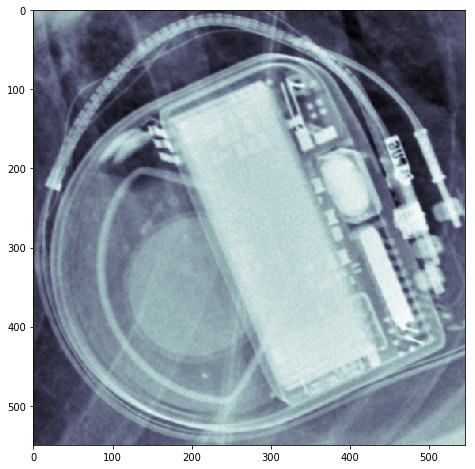

In [84]:
def get_pacemaker_array(filename, rotate=0): 
    box = get_box(filename)
    
    patient_id = filename.split("_")[0]
    clipnum = filename.split("_")[1].split(".")[0] + ".dcm"
    
    dc_array = dicom.read_file(img_filepath + patient_id + "/" + clipnum).pixel_array
    pacemaker_array = dc_array[box[2]:box[3],box[0]:box[1]]
    
    pacemaker_array = np.rot90(pacemaker_array, k=rotate)
    
    return pacemaker_array
    
pacemaker = get_pacemaker_array('2620820_6565471-2169-11-22-1313-ANTERO-POSTERIOR.xml', rotate=3)
plt.figure(figsize=[8,8])
plt.imshow(pacemaker, cmap=pylab.cm.bone)
plt.show()

## Save all patches + rotated

In [98]:
for ann_file in os.listdir(ann_filepath): 
    if not ann_file.endswith('.xml'): 
        continue
    
    for i in range(4): 
        try: 
            pacemaker = get_pacemaker_array(ann_file, rotate=i)

            save_filename = png_filepath + "pacemaker_patches/" + ann_file.split('.')[0] + "_" + str(i) + ".png"
            save_image(pacemaker, save_filename)
        
        except Exception as e: 
            print ann_file, e

'NoneType' object has no attribute 'xmin'
'NoneType' object has no attribute 'xmin'
'NoneType' object has no attribute 'xmin'
'NoneType' object has no attribute 'xmin'
